# Geographic Visualization of the Dominican Republic Provinces

This project aims to represent the provinces of the Dominican Republic on a geographic map, displaying information related to population. We use geospatial data in **GeoJSON** format along with a tabular dataset that includes province names, coordinates, and population data.

## Data Used

### 1. GeoJSON File
The **GeoJSON** file containing the geographic boundaries of the provinces was obtained from [Cartography Vectors](https://cartographyvectors.com/map/1436-dominican-republic-with-regions).

### 2. DataFrame with Province Data
The DataFrame contains the following fields:
- **Province**: Name of the province.
- **Latitude and Longitude**: Geographical coordinates of the province.
- **Population**: Total population of the province.

In [ ]:
#!pip install beautifulsoup4 pandas requests geopandas mapclassify

In [257]:
#!pip install mapclassify

### 1. Loading Required Libraries
In this section, we load the libraries needed to handle geographic data, perform operations on dataframes, and create maps.

- `geopandas` for handling geospatial data.
- `pandas` for manipulating tabular data.
- `matplotlib` for data visualization.
- `shapely.geometry` for creating points from coordinates.

In [254]:
import requests
import pandas as pd
import geopandas as gpd
from bs4 import BeautifulSoup
import matplotlib.pyplot  as plt

### 2. Load the GeoJSON File and the Coordinate DataFrame
We load the **GeoJSON** file containing the boundaries of the provinces of the Dominican Republic and combine it with the DataFrame containing the province data (name, population, coordinates).

- The **GeoJSON** is downloaded from the National Geographic Institute of the Dominican Republic (IDERD) website.
- The DataFrame contains the provinces with their respective latitudes, longitudes, and population.


In [259]:
url = "https://es.wikipedia.org/wiki/Anexo:Ciudades_de_Rep%C3%BAblica_Dominicana_por_poblaci%C3%B3n"
provinces_geojson = gpd.read_file('dominican-republic-with-regions_.geojson')

### 2.1. Extracting and Processing Data from an HTML Table with Web Scraping

In this section, we perform web scraping to extract data from an HTML table on Wikipedia that contains information about cities and provinces. We then process this data to build a DataFrame that displays the total population by province.

#### 2.1.1 Making the HTTP Request and Parsing the Web Page

We use the `requests` library to make a GET request to the URL containing the table of interest. We then use `BeautifulSoup` to parse the HTML content of the page.

In [184]:
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')

#### 2.1.2 Finding the HTML Table
We use the soup.find() method to locate the table that has the wikitable class. This allows us to identify the correct table on the page.

In [185]:
table = soup.find('table', {'class': 'wikitable'})
#print(table)

#### 2.1.3 Extracting Rows and Columns

Using the find_all('tr') method, we extract all the rows from the table. Then, we iterate over the rows to extract the data from the columns (cells <td>), such as the ranking, city, province, and population.

In [186]:
rows = table.find_all('tr')
#print(rows)

In [187]:
data = []
for row in rows[1:]:
    columns = row.find_all('td')
    if len(columns) > 0:
        ranking = columns[0].get_text(strip=True)
        city = columns[1].get_text(strip=True)
        province = columns[2].get_text(strip=True)
        population = columns[3].get_text(strip=True)
        data.append([ranking,city,province, population])
    else:
        print('No data Found')

#### 2.1.4 Creating a DataFrame

We create a pandas DataFrame from the extracted data, with the columns:
- **`Ranking`**
- **`City`**
- **`Province`**
- **`Population`**

To ensure correct handling, we convert the data types to string.

In [188]:
df = pd.DataFrame(data, columns=['Ranking', 'City', 'Province', 'Population'])

In [189]:
#cust_segmentation_copy  = cust_segmentation_copy.astype({'Education': 'string', 'Marital_Status': 'string'})
df = df.astype({'Ranking': 'string','City': 'string','Province': 'string','Population': 'string'})

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     54 non-null     string
 1   City        54 non-null     string
 2   Province    54 non-null     string
 3   Population  54 non-null     string
dtypes: string(4)
memory usage: 1.8 KB


#### 2.1.5 Cleaning Population Data
We remove the commas from the numbers in the Population column so that we can convert them to int type.

In [191]:
df['Population'] = df['Population'].str.replace(',','')

In [192]:
df.head()

,Ranking,City,Province,Population
0,1,Santo Domingo Este,Santo Domingo,1029117
1,2,Distrito Nacional,Distrito Nacional,1029110
2,3,Santiago de los Caballeros,Santiago,771748
3,4,Santo Domingo Norte,Santo Domingo,674274
4,7,Higuey,La Altagracia,415084


In [206]:
df = df.astype({'Population':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     54 non-null     string
 1   City        54 non-null     string
 2   Province    54 non-null     string
 3   Population  54 non-null     int64 
dtypes: int64(1), string(3)
memory usage: 1.8 KB


#### 2.1.6 Grouping by Province

We eliminate the unnecessary columns **`(Ranking and City)`** and group the data by province, adding the total population by province.

In [212]:
grouped_df = df.copy()
grouped_df = grouped_df.drop(columns=['Ranking', 'City'])
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Province    54 non-null     string
 1   Population  54 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 996.0 bytes


#### 2.1.7 Correction of Name Errors in Provinces

We made a correction to the name of the province **`"Baoruco"`**, replacing it with **`"Bahoruco"`** to maintain consistency in the data.

In [214]:
grouped_df = grouped_df.groupby(['Province'])['Population'].sum().reset_index()
grouped_df['Province'] = grouped_df['Province'].replace('Baoruco', 'Bahoruco')
grouped_df.tail(100)

,Province,Population
0,Bahoruco,40644
1,Barahona,90166
2,Dajabón,35809
3,Distrito Nacional,1029110
4,Duarte,238782
5,El Seibo,72775
6,Espaillat,204803
7,Hato Mayor,70582
8,Hermanas Mirabal,70282
9,La Altagracia,415084


In [260]:
#grouped_df.plot(x='Province', y='Population',kind='bar')

### 2.1.8 Population Visualization by Province

In this section, we create a visualization that shows the total population of the Dominican Republic grouped by province. We use a bar chart to represent this data, customizing the axes and the title of the chart.

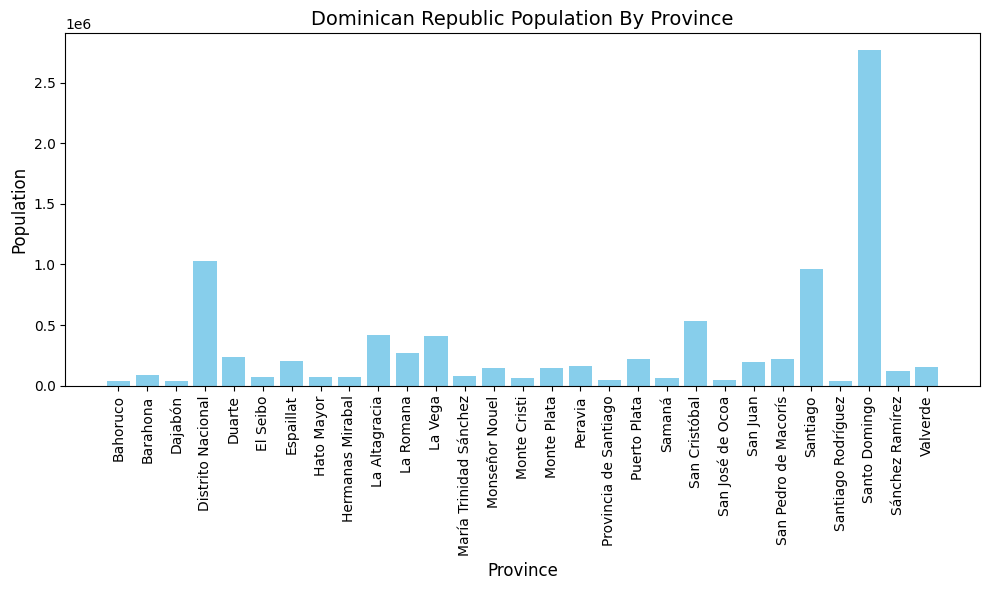

In [216]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(grouped_df['Province'], grouped_df['Population'], color='skyblue')

ax.set_title('Dominican Republic Population By Province', fontsize=14)
ax.set_xlabel('Province', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### 3. Preparing and Joining Coordinate Data

In this section, we load the **``province_coordinates.csv``** file and merge it to add the coordinates of each province to our DataFrame.

Columns added: **``Latitudes``** and **``Longitude.``**

In [237]:
coordinates_df = pd.read_csv('province_coordinates.csv')

In [238]:
province_df_with_coordinates = pd.merge(grouped_df, coordinates_df, on='Province', how='left')

In [239]:
province_df_with_coordinates.head()

,Province,Population,Latitude,Longitude
0,Bahoruco,40644,18.5103,-71.4489
1,Barahona,90166,18.2090,-71.1008
2,Dajabón,35809,19.5486,-71.7084
3,Distrito Nacional,1029110,18.4834,-69.9290
4,Duarte,238782,19.2076,-70.3033


### 4. Data Preparation and Joining

In this section, we join the data from the **`GeoJSON`** file with the DataFrame containing the provinces and their population, using the province names as the join key.

- We verify that the province names in both files match, and make any necessary corrections.
- We combine the **`GeoJSON`** GeoDataFrame with the population DataFrame to create a new dataset containing both geographic and tabular information.

**`merged = provinces_geojson.set_index('name').join(province_df_with_coordinates.set_index('Province'))`**

### 5. Creating the Choropleth Map
We generate a choropleth map using the combined data, where each province is colored according to its population. We use `geopandas` and `matplotlib` to create the visualization.

- The `population` column in the DataFrame is used to define the color intensity.
- The map is adjusted with the `OrRd` (orange-red) color palette to show the differences in population.

**`merged.plot(column='Population', cmap='YlOrRd', legend=True)`**

### 6. Interactive Map Visualization
As a complement, we can use the **`geopandas`** library to create a map where the provinces are shown with markers based on their coordinates. The map can be viewed in the browser and allows interaction with the geographic data.

- Each marker shows the name of the province and its population.

**``plt.show()``**

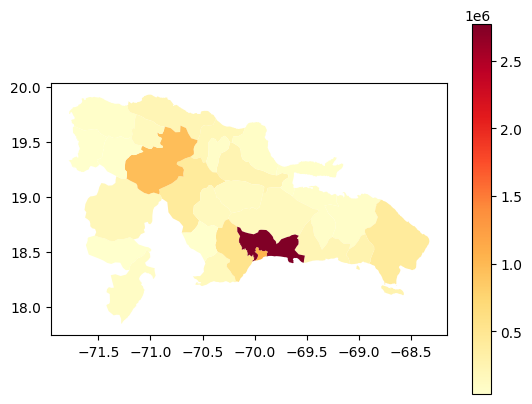

In [255]:
# Unir el DataFrame con el GeoDataFrame basado en la columna de provincias
merged = provinces_geojson.set_index('name').join(province_df_with_coordinates.set_index('Province'))

# Crear un mapa coroplético basado en la población
merged.plot(column='Population', cmap='YlOrRd', legend=True)
plt.show()

### 7. Saving files
Finally, we save the following files in ``.csv``:

- **``dominican_republic_population.csv``**: contains the population by province
- **``grouped_data.csv``**: contains the population data **``grouped``** by province.

In [166]:
df.to_csv('dominican_republic_population.csv')


In [ ]:
grouped_df.to_csv('grouped_data.csv')

### Conclusion

This project provides a clear and visually appealing representation of the Dominican Republic's provinces and their population data. The visualization can be adapted for both static and interactive displays, offering flexibility depending on the required output.

It serves as a useful tool for understanding the demographic distribution of the Dominican Republic and can be extended to include additional socio-economic indicators or datasets for more comprehensive insights.